In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns
sns.set(style="whitegrid")


In [27]:
df = pd.read_csv("C:\sportify\spotify dataset.csv")

<span style="background-color: yellow;">DATA EXPLORATION</span>

In [28]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [29]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [30]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [31]:
df.tail()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432
32832,29zWqhca3zt5NsckZqDf6c,Typhoon - Original Mix,Julian Calor,27,0X3mUOm6MhxR7PzxG95rAo,Typhoon/Storm,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-4.571,0,0.0385,0.000133,0.341000,0.7420,0.0894,127.984,337500


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [33]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

<span style="background-color: yellow;">DATA PRE-PROCESSING</span>

In [34]:
df = df.dropna(subset=['track_name', 'track_artist', 'track_album_name'])  
df.shape

(32828, 23)

In [35]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

In [36]:
numeric_cols = [
    'danceability','energy','loudness','speechiness','acousticness',
    'instrumentalness','liveness','valence','tempo','duration_ms'
]

df_numeric = df[numeric_cols]

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

<span style="background-color: yellow;">DATA ANALYSIS & VISUALIZATION</span>

<span style="background-color: #E6E6FA;">Correlation Matrix</span>

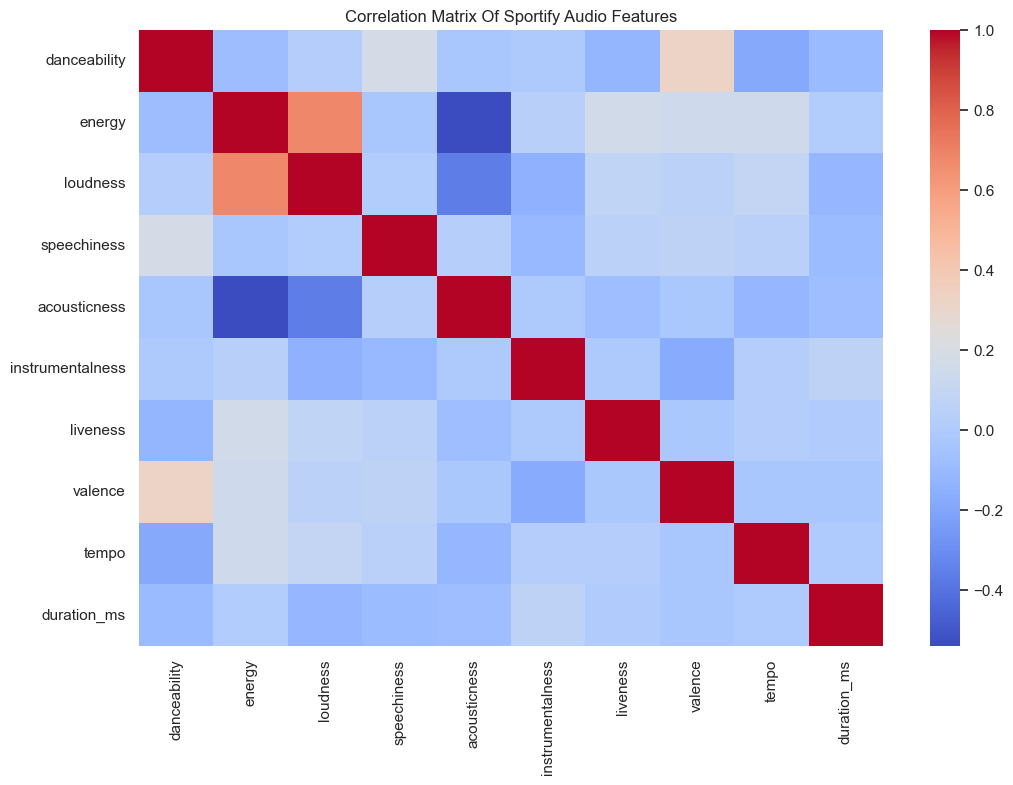

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix Of Sportify Audio Features")
plt.show()

<span style="background-color: #E6E6FA;">Distribution Plots Of Key Audio Features</span>

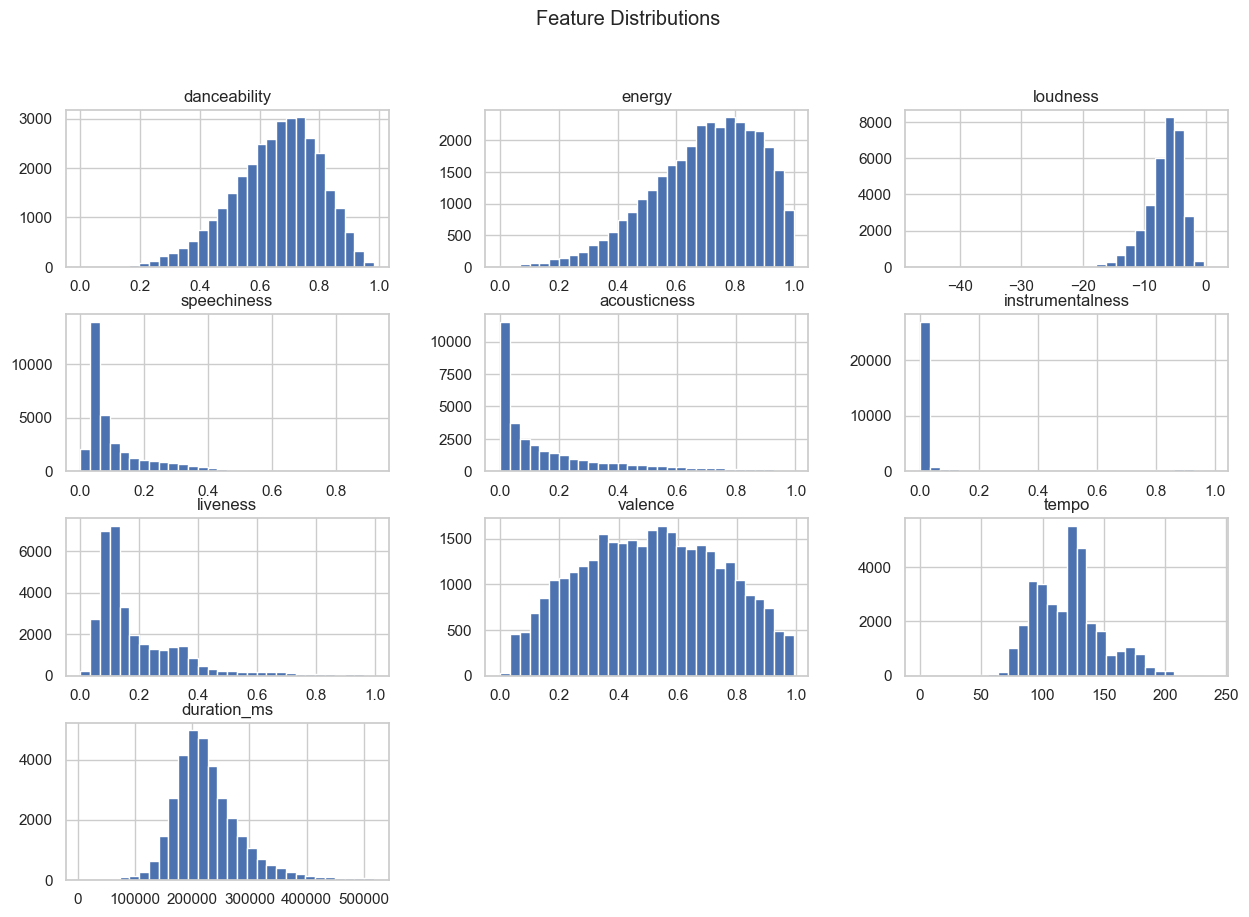

In [39]:
df_numeric.hist(figsize=(15, 10), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

<span style="background-color: #E6E6FA;">Playlist Genre Distribution</span>

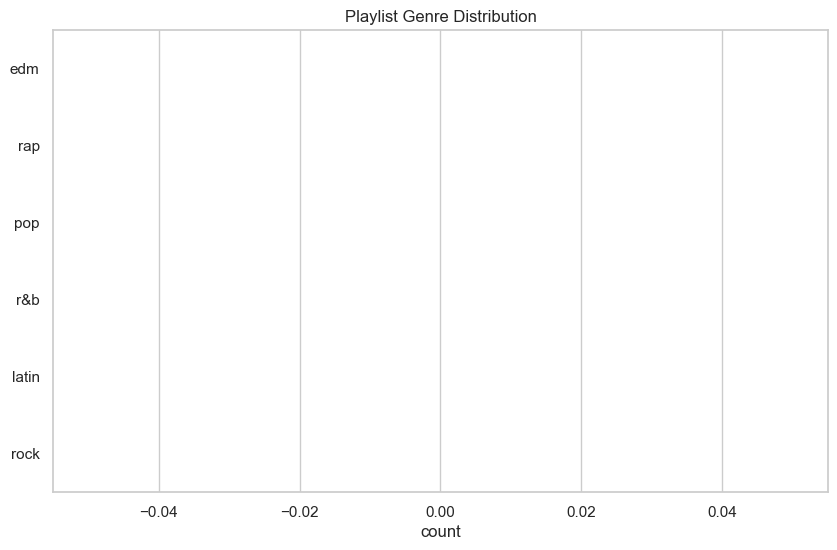

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(['playlist_genre'], order=df['playlist_genre'].value_counts().index)
plt.title("Playlist Genre Distribution")
plt.show()

<span style="background-color: #E6E6FA;">Playlist Name Distribution</span>

C:\Users\chint\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


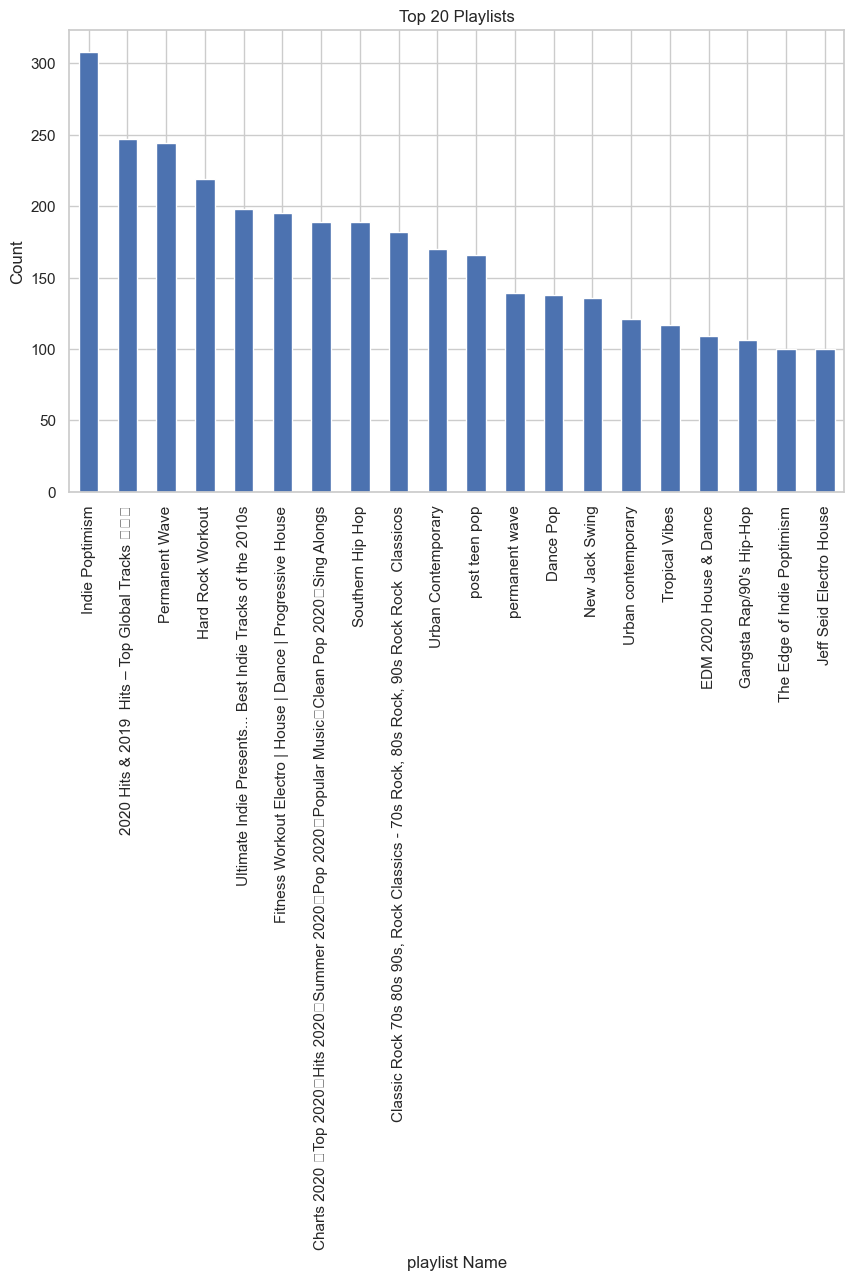

In [41]:
plt.figure (figsize=(10,6))
df['playlist_name'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Playlists")
plt.xlabel("playlist Name")
plt.ylabel("Count")
plt.show()

<span style="background-color: #E6E6FA;">LOUDNESS VS ENERGY BY GENRE</span>

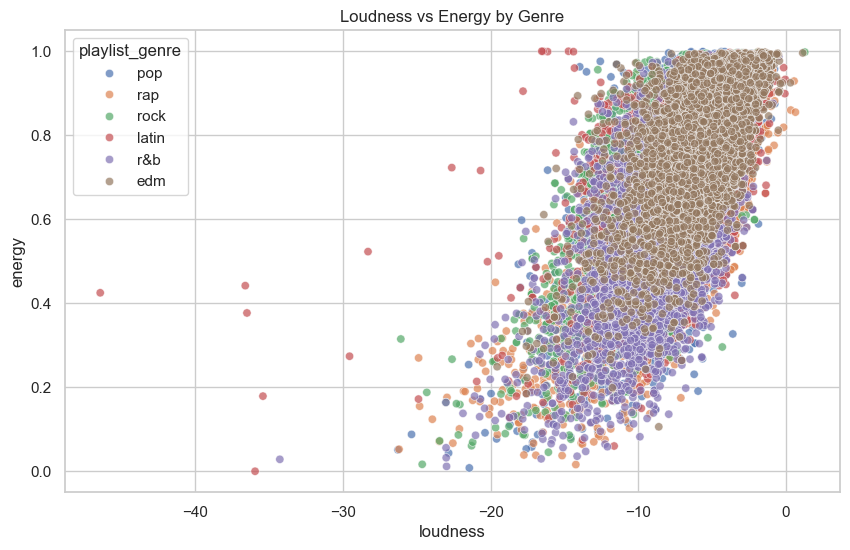

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='loudness', y='energy', hue='playlist_genre', alpha=0.7)
plt.title("Loudness vs Energy by Genre")
plt.show()

<span style="background-color: #E6E6FA;">TEMPO DISTRIBUTION OF SONGS </span>

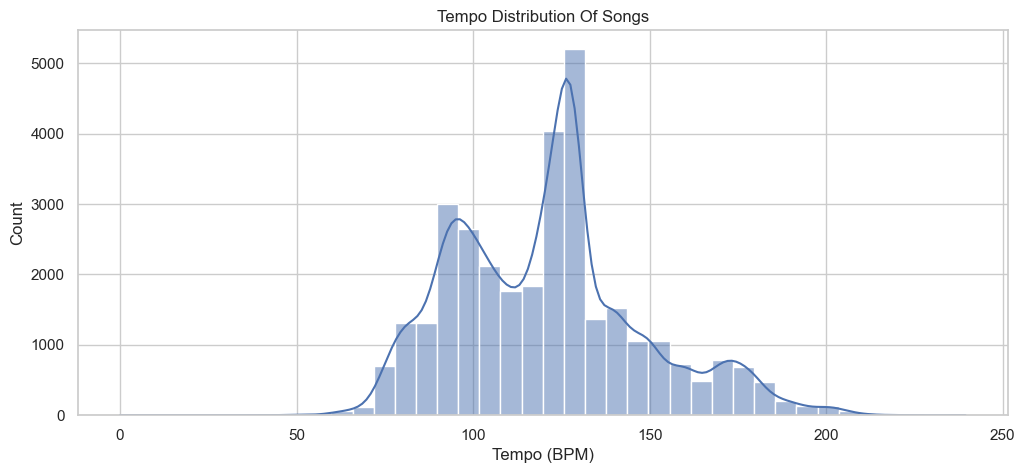

In [63]:
plt.figure(figsize=(12, 5))
sns.histplot(df['tempo'], bins=40, kde=True)
plt.title("Tempo Distribution Of Songs")
plt.xlabel("Tempo (BPM)")
plt.show()

<span style="background-color: #E6E6FA;">ACOUSTICNESS VS INSTRUMENTALNESS BY GENRE</span>

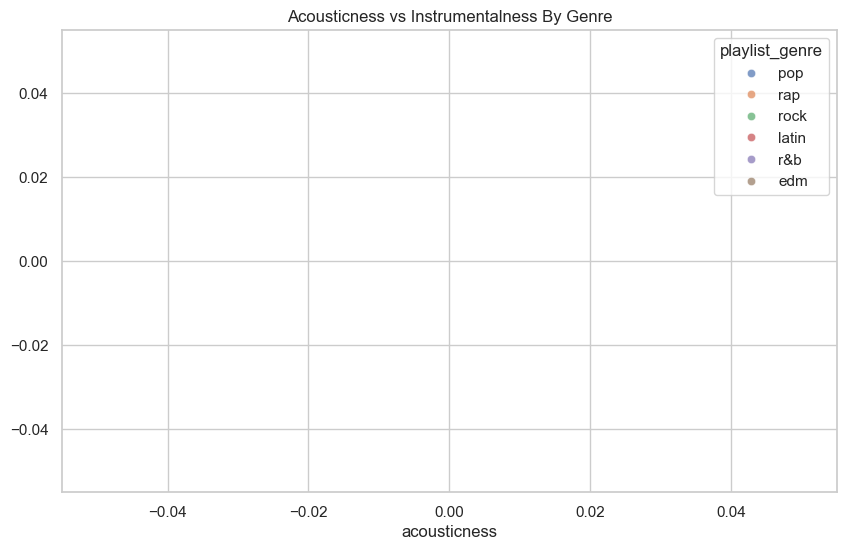

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='acousticness', hue='playlist_genre', alpha=0.7)
plt.title("Acousticness vs Instrumentalness By Genre")
plt.show()

<span style="background-color: yellow;">CULSTERING</span>

<span style="background-color: #E6E6FA;">PCA</span>

In [25]:
from sklearn.decomposition import PCA

pca =PCA(n_components=2)
pca_values = pca.fit_transform(scaled_data)

df_pca = pd.DataFrame(pca_values, columns=['PC1','PC2'])
df_pca.head()

,PC1,PC2
0,1.550087,0.655473
1,1.092480,0.895252
2,1.630101,0.614527
3,1.598173,0.062885
4,1.091290,0.589466


In [43]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

In [44]:
df_pca['cluster'] = df['cluster']
df_pca.head()

,PC1,PC2,cluster
0,1.550087,0.655473,1.0
1,1.092480,0.895252,1.0
2,1.630101,0.614527,1.0
3,1.598173,0.062885,1.0
4,1.091290,0.589466,1.0


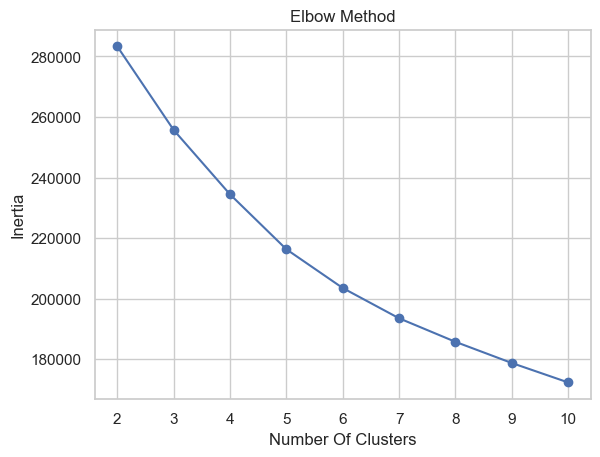

In [45]:
from sklearn.cluster import KMeans

inertia = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Number Of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [46]:
from sklearn.metrics import silhouette_score

for k in range(2,11):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(scaled_data)
    print(k, silhouette_score(scaled_data, labels))

2 0.1775532648532321
3 0.12607617060132742
4 0.13323562398482014
5 0.1346707132164668
6 0.13687898739390866
7 0.12603701952766797
8 0.12357949745966265
9 0.12320339751802196
10 0.1266185607188731


In [47]:
k = 4
kmeans=KMeans(n_clusters=k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(scaled_data)

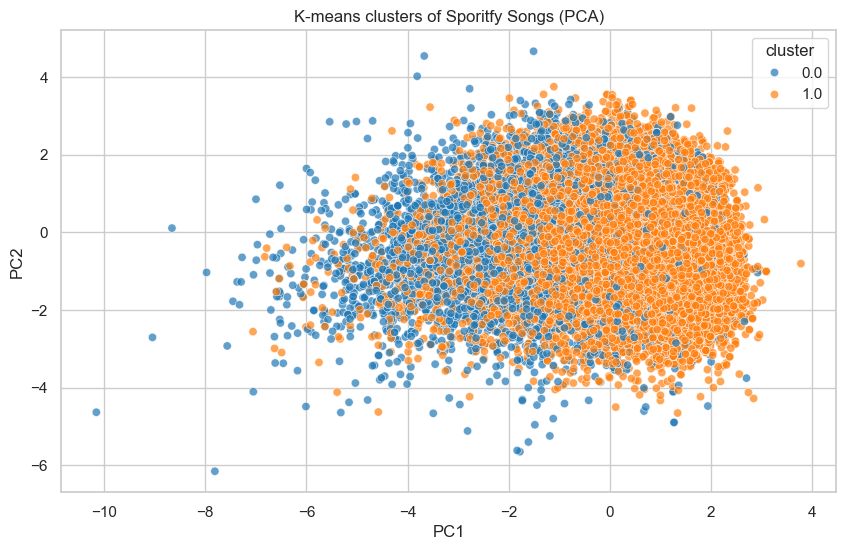

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca['PC1'], 
                y=df_pca['PC2'], 
                hue=df_pca['cluster'], 
                palette='tab10',
                alpha=0.7 
)
plt.title("K-means clusters of Sporitfy Songs (PCA)")
plt.show()

<span style="background-color: yellow;">CLUSTERING BASED ON PLAYLIST GENRE/ PLAYLIST NAME</span>

In [49]:
genre_cluster = df.groupby(['playlist_genre','cluster'])[numeric_cols].mean()
genre_cluster

danceability    energy   loudness  speechiness  \
playlist_genre cluster                                                   
edm            0            0.591820  0.835057  -4.551457     0.081232   
               1            0.685375  0.834214  -6.182262     0.075584   
               2            0.761482  0.751374  -5.722518     0.110077   
               3            0.634654  0.498387  -9.674749     0.090671   
latin          0            0.616004  0.769531  -5.302695     0.089801   
               1            0.720508  0.734578  -8.259045     0.073545   
               2            0.759465  0.735025  -5.761101     0.111505   
               3            0.627803  0.464751  -9.763769     0.086516   
pop            0            0.565840  0.782346  -5.240505     0.067899   
               1            0.636566  0.748401  -7.659222     0.051389   
               2            0.726840  0.717734  -5.817554     0.083658   
               3            0.606017  0.441527  -9.749680     0.073009   
r&b            0            0.556429  0.704784  -6.100294     0.109715   
               1            0.653330  0.671275  -8.245780     0.070380   
               2            0.746900  0.666095  -7.049058     0.136075   
               3            0.608518  0.417712  -9.919019     0.093676   
rap            0            0.586524  0.752876  -5.376758     0.164183   
               1            0.652029  0.639715  -7.929732     0.094033   
               2            0.777878  0.676607  -6.519215     0.224894   
               3            0.679664  0.417318 -11.044173     0.162808   
rock           0            0.463477  0.836585  -5.896880     0.065860   
               1            0.507215  0.767183  -8.143510     0.055465   
               2            0.666660  0.725308  -7.920776     0.052571   
               3            0.530718  0.448629 -11.726326     0.041210   

                        acousticness  instrumentalness  liveness   valence  \
playlist_genre cluster                                                       
edm            0            0.055098          0.040647  0.248374  0.334772   
               1            0.038872          0.747112  0.196568  0.338354   
               2            0.114552          0.038513  0.160675  0.623091   
               3            0.479575          0.099094  0.152195  0.337347   
latin          0            0.121625          0.009257  0.249122  0.462126   
               1            0.127418          0.762784  0.177023  0.467571   
               2            0.179721          0.008012  0.162923  0.692019   
               3            0.540008          0.064832  0.164319  0.430336   
pop            0            0.074966          0.014048  0.219429  0.426909   
               1            0.099697          0.704980  0.169018  0.457752   
               2            0.130252          0.011001  0.147844  0.648515   
               3            0.533464          0.071604  0.145535  0.350794   
r&b            0            0.112032          0.009664  0.240524  0.422918   
               1            0.135677          0.676101  0.170706  0.521581   
               2            0.149767          0.007803  0.166554  0.650850   
               3            0.505140          0.030468  0.157840  0.401319   
rap            0            0.094571          0.011008  0.262346  0.388192   
               1            0.136274          0.772326  0.174674  0.356346   
               2            0.149019          0.003918  0.178194  0.587370   
               3            0.506683          0.254721  0.154776  0.380244   
rock           0            0.049517          0.023210  0.237626  0.481882   
               1            0.101215          0.689466  0.209250  0.516926   
               2            0.141083          0.020354  0.143627  0.777571   
               3            0.421543          0.053276  0.168135  0.449040   

                             tempo    duration_ms  
playlist_genre clu

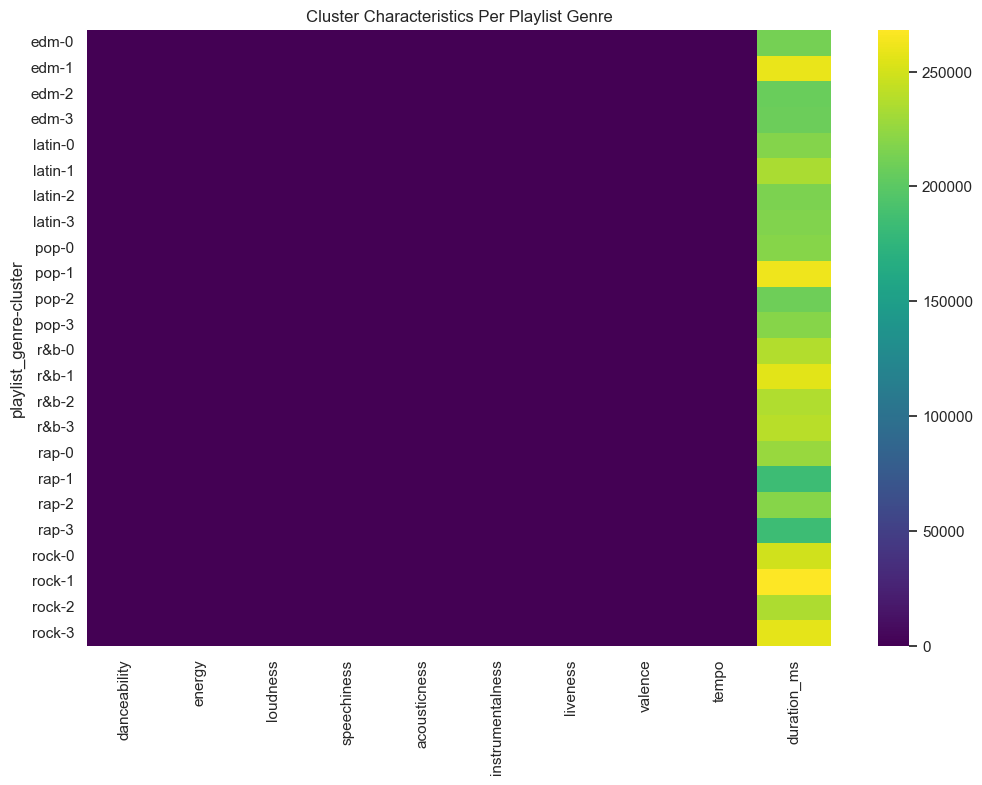

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(genre_cluster, cmap='viridis')
plt.title("Cluster Characteristics Per Playlist Genre")
plt.show()

C:\Users\chint\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\chint\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128175 (\N{HUNDRED POINTS SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


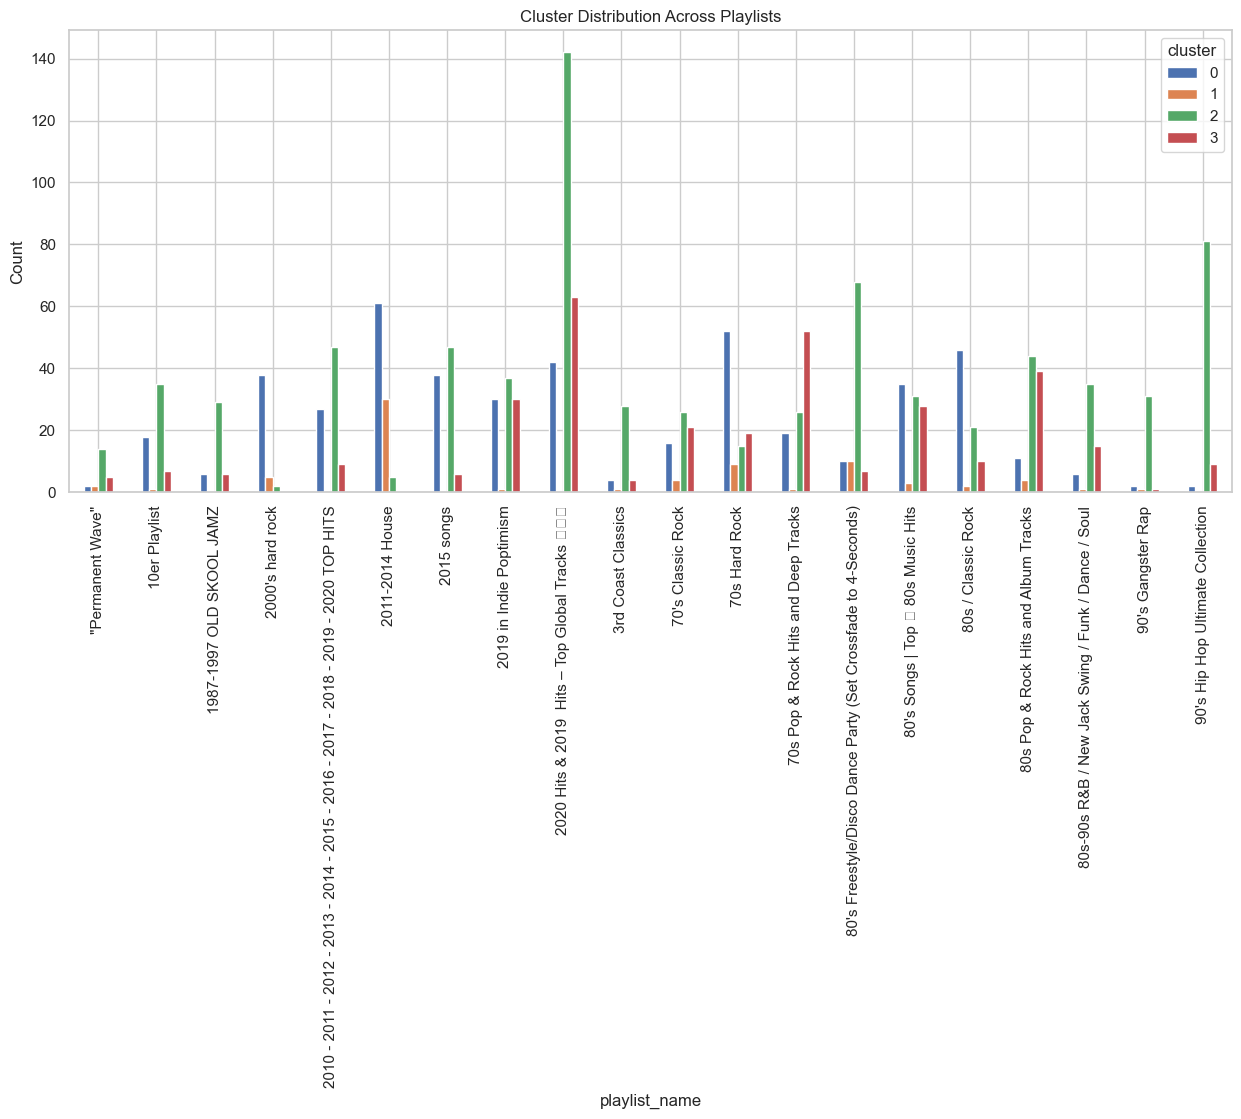

In [60]:
playlist_cluster = df.groupby(['playlist_name','cluster',]).size().unstack(fill_value=0)

playlist_cluster.head(20).plot(kind='bar', figsize=(15,6))
plt.title("Cluster Distribution Across Playlists")
plt.ylabel("Count")
plt.show()

<span style="background-color: yellow;">BUILD THE MODEL</span>

In [53]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=10, metric='euclidean')
nn.fit(scaled_data)

,n_neighbors,10
,radius,1.0
,algorithm,'auto'
,leaf_size,30
,metric,'euclidean'
,p,2
,metric_params,None
,n_jobs,None


<span style="background-color: #E6E6FA;">RECOMMENDATION SYSTEM</span>

In [54]:
def recommend_song(index):
    distances, indices = nn.kneighbors([scaled_data[index]])
    return df.iloc[indices[0]][['track_name', 'track_artist', 'playlist_genre']]

In [56]:
recommend_song(90)

,track_name,track_artist,playlist_genre
26817,Lost In Japan - Remix,Shawn Mendes,edm
90,Lost In Japan - Remix,Shawn Mendes,pop
5440,Goodbyes (feat. Method Man),The Knocks,pop
29789,Another Night In Paradise,Noize Generation,edm
9861,We'll Try Again Tomorrow,Tvbuu,rap
29853,Be Real - Kenny Gold Remix,Rasmus Faber,edm
8893,Zahnlücke,Veysel,rap
2189,Make U Love Me,Tujamo,pop
32254,The Fever,Bassjackers,edm
29219,Distortion,The Kemist,edm
